## Introduction

***Why are ML pipelines important?***

The main objective of having a proper pipeline for any ML model is to exercise control over it. A well-organised pipeline makes the implementation more flexible. It is like having an exploded view of a computer where you can pick the faulty pieces and replace it- in our case, replacing a chunk of code.

***Benefits of a Machine Learning Pipeline***

* Make continuous predictions.
* Get up and running right away.
* Accessible to every team.
1. Data Preprocessing.
2. Data Cleaning.
3. Feature Engineering.
4. Model Selection.
5. Prediction Generation.

## About Dataset
The Iris Dataset contains four features (length and width of sepals and petals) of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). ... The dataset is often used in data mining, classification and clustering examples and to test algorithms.

<img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png' />

## Some Useful Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Load Dataset

In [3]:
iris = load_iris(as_frame=True)

In [4]:
X, y = iris.data, iris.target.map(dict(enumerate(iris.target_names)))
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
1,4.9,3.0,1.4,0.2
8,4.4,2.9,1.4,0.2
93,5.0,2.3,3.3,1.0
106,4.9,2.5,4.5,1.7


In [5]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: target, dtype: int64

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

## Pipeline

In [7]:
## Pipeline Creation
## 1.Data preprocessing by using Standard scalar and Label encoder
## 2.Reduce Dimension using PCA
## 3.Apply classifier

In [8]:
preprocess_pipeline = Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=3))])

In [9]:
logistic_regression_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('logistic_regression', LogisticRegression())
])

decision_tree_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('decision_tree', DecisionTreeClassifier())
    
])

random_forest_pipeline = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('random_forest', RandomForestClassifier())
])

In [10]:
models_pipelines = [logistic_regression_pipeline,
                    decision_tree_pipeline, 
                    random_forest_pipeline,                   
                   ]

In [11]:
# dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0:'Logistic Regression',1:'Decision Tree',2:'Random Forest'}

In [20]:
# fit the pipelines
for i,pipe in enumerate(models_pipelines):
    pipe.fit(X_train,y_train)
    print(f'Model {pipe_dict[i]} training accuracy: {pipe.score(X_train, y_train):.4}')

Model Logistic Regression training accuracy: 0.9667
Model Decision Tree training accuracy: 1.0
Model Random Forest training accuracy: 1.0


In [21]:
# model accuracy on the test set
for i,model in enumerate(models_pipelines):
    print('{} Test accuracy: {}'.format(pipe_dict[i],np.round(model.score(X_test,y_test)*100),1))

Logistic Regression Test accuracy: 100.0
Decision Tree Test accuracy: 93.0
Random Forest Test accuracy: 100.0


### 3D Visualization of the PCA output

In [22]:
from sklearn import config_context

In [23]:
with config_context(transform_output="pandas"):
    train_pca_features = preprocess_pipeline.fit_transform(X_train)

In [24]:
train_pca_features['class'] = y_train
train_pca_features.head()

,pca0,pca1,pca2,class
22,-2.741058,0.415798,0.314365,setosa
15,-2.214577,2.604762,0.030006,setosa
65,0.926828,0.529167,-0.516368,versicolor
11,-2.293429,0.108078,0.072359,setosa
42,-2.524548,-0.496938,0.280547,setosa


In [25]:
import plotly_express as px

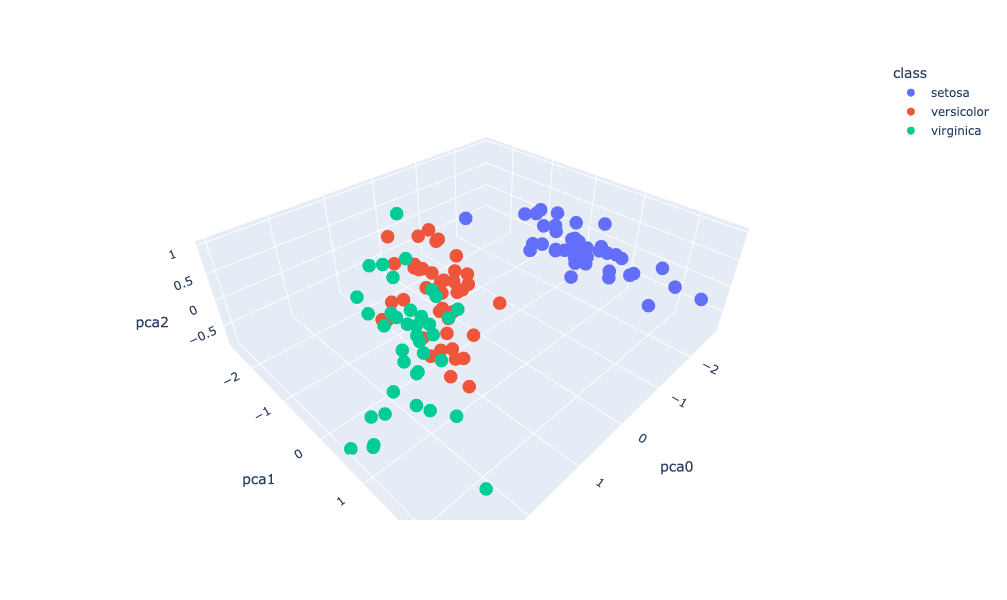

In [26]:
px.scatter_3d(train_pca_features, x = 'pca0', y= 'pca1', z= 'pca2', color='class', height=600)